## code for importing an excel spreadsheet into python

In [2]:
!pip install pandas openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]


In [2]:
import pandas as pd

df = pd.read_excel("adult.xlsx")
df


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## look at basic info

In [4]:
# column names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
#data shape
df.shape

(32561, 15)

In [7]:
#data types
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

## look at missing values

In [11]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
(df == '?').sum() # because in this particular data set some missing are coded as ?


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:
df = df.replace('?', pd.NA) # replace "?" with proper missing values


## explore numerical features

In [12]:
df.describe() # summary stats


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## histogram of age

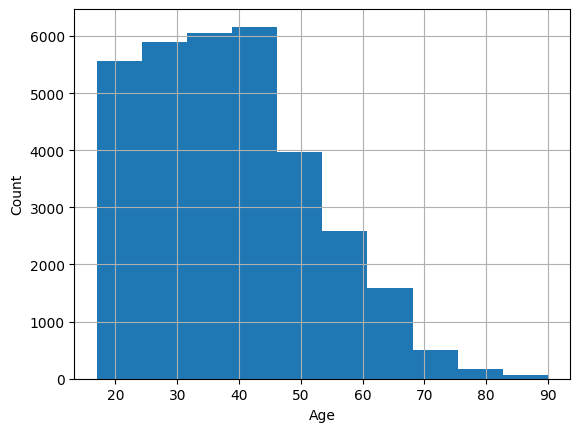

In [13]:
import matplotlib.pyplot as plt

df['age'].hist()
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


<Axes: xlabel='age', ylabel='hours.per.week'>

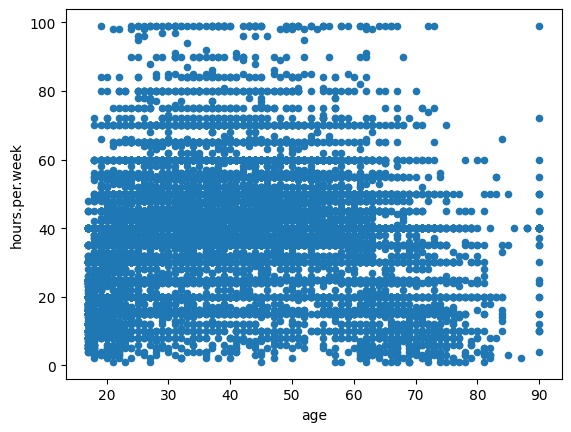

In [14]:
# scatterplot - age vs hours
df.plot(kind='scatter', x='age', y='hours.per.week')


## explore categoricals

In [15]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [16]:
# "normalize" to a percentage (not really normalizing in the statistical sense)
df['income'].value_counts(normalize=True)


income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

<Axes: xlabel='workclass'>

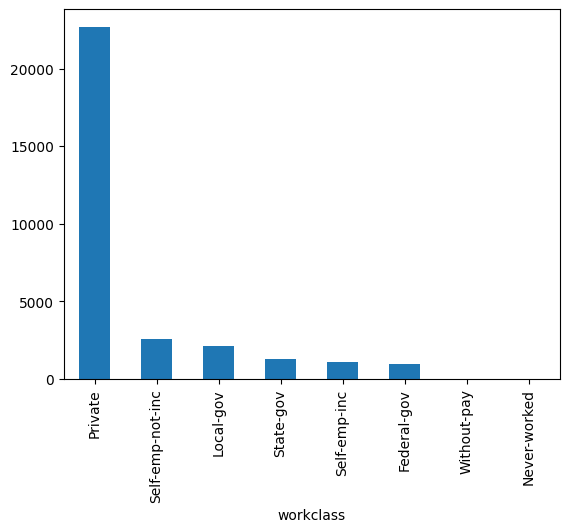

In [18]:
# bar plot
df['workclass'].value_counts().plot(kind='bar')


## grouping / summary tables

In [3]:
df.groupby('marital.status')['hours.per.week'].mean()

marital.status
Divorced                 41.246680
Married-AF-spouse        41.130435
Married-civ-spouse       43.284856
Married-spouse-absent    39.669856
Never-married            36.939998
Separated                39.301463
Widowed                  32.979859
Name: hours.per.week, dtype: float64

In [4]:
df.groupby('marital.status')['hours.per.week'].median()

marital.status
Divorced                 40.0
Married-AF-spouse        40.0
Married-civ-spouse       40.0
Married-spouse-absent    40.0
Never-married            40.0
Separated                40.0
Widowed                  40.0
Name: hours.per.week, dtype: float64

In [5]:
df.groupby('marital.status')['hours.per.week'].describe()

,count,mean,std,min,25%,50%,75%,max
marital.status,,,,,,,,
Divorced,4443.0,41.246680,10.676632,1.0,40.0,40.0,45.0,99.0
Married-AF-spouse,23.0,41.130435,19.440596,3.0,39.0,40.0,47.0,90.0
Married-civ-spouse,14976.0,43.284856,11.905047,1.0,40.0,40.0,50.0,99.0
Married-spouse-absent,418.0,39.669856,11.767374,3.0,37.0,40.0,40.0,99.0
Never-married,10683.0,36.939998,12.432542,1.0,30.0,40.0,40.0,99.0
Separated,1025.0,39.301463,10.377534,2.0,37.0,40.0,40.0,99.0
Widowed,993.0,32.979859,14.058690,1.0,21.0,40.0,40.0,99.0


In [19]:
df.groupby('income')['hours.per.week'].mean()

income
<=50K    38.840210
>50K     45.473026
Name: hours.per.week, dtype: float64

In [20]:
df.groupby('education')['capital.gain'].mean().sort_values(ascending=False)

education
Prof-school     10414.416667
Doctorate        4770.145278
Masters          2562.563552
Bachelors        1756.299533
Preschool         898.392157
Assoc-voc         715.051375
Assoc-acdm        640.399250
Some-college      598.824167
HS-grad           576.800114
10th              404.574491
9th               342.089494
12th              284.087760
7th-8th           233.939628
11th              215.097872
5th-6th           176.021021
1st-4th           125.875000
Name: capital.gain, dtype: float64

In [8]:
# create a new variable for over 50 and works > 50 hours per week
df['over50_and_workhard'] = (
    (df['age'] > 50) &
    (df['hours.per.week'] > 50)
).astype(int)

df[['age', 'hours.per.week', 'over50_and_workhard']].head()



,age,hours.per.week,over50_and_workhard
0,90,40,0
1,82,18,0
2,66,40,0
3,54,40,0
4,41,40,0


## correlation matrix

In [21]:
df.corr(numeric_only=True)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [23]:
!pip install pandas seaborn

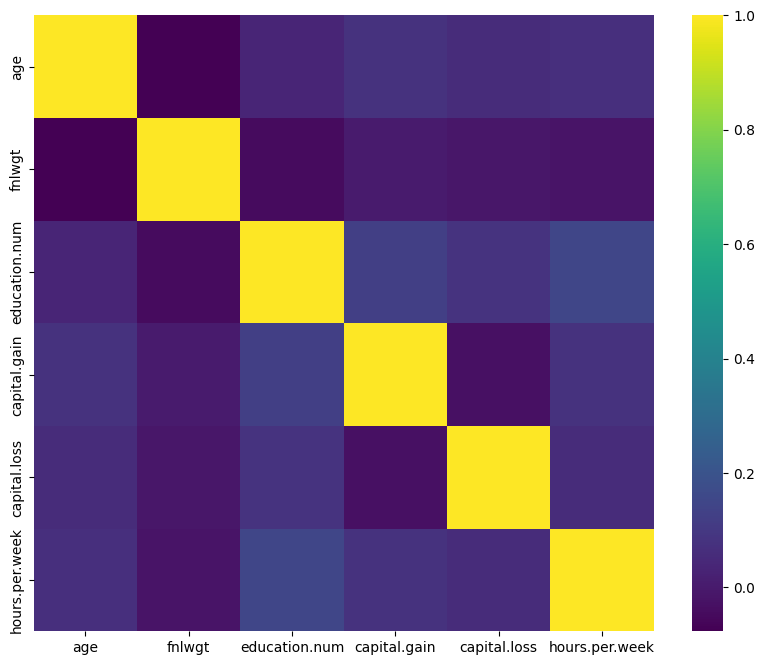

In [24]:
# heat map
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="viridis")
plt.show()


## one step final summary

In [31]:
from skimpy import skim

skim(df)



╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 32561  │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 15     │ │ int64       │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column           ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ age              │   0 │     0 │   38.58 │   13.64 │     17 │      28 │     37 │     48 │      90 │ ██▆▃▁  │  │
│ │ fnlwgt           │   0 │     0 │  189800 │  105500 │  12280 │  117800 │ 178400 │ 237100 │ 1485000 │   █▂   │  │
│ │ education.num    │   0 │     0 │   10.08 │   2.573 │      1 │       9 │     10 │     12 │      16 │  ▁▁█▄▁ │  │
│ │ capital.gain     │   0 │     0 │    1078 │    7385 │      0 │       0 │      0 │      0 │  100000 │   █    │  │
│ │ capital.loss     │   0 │     0 │    87.3 │     403 │      0 │       0 │      0 │      0 │    4356 │   █    │  │
│ │ hours.per.week   │   0 │     0 │   40.44 │   12.35 │      1 │      40 │     40 │     45 │      99 │  ▁▂█▂  │  │
│ └──────────────────┴─────┴───────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃      ┃          ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA   ┃ NA %     ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ workclas │ 1836 │ 5.638647 │ Private  │ Self-emp- │ Federal- │ Without-p │     8.27 │      0.94 │    30725 │  │
│ │ s        │      │ 46168729 │          │ not-inc   │ gov      │ ay        │          │           │          │  │
│ │          │      │        4 │          │           │          │           │          │           │          │  │
│ │ educatio │    0 │        0 │ 9th      │ Some-coll │ 10th     │ Some-coll │     8.43 │         1 │    32561 │  │
│ │ n        │      │          │          │ ege       │          │ ege       │          │           │          │  │
│ │ marital. │    0 │        0 │ Widowed  │ Married-s │ Divorced │ Widowed   │     14.4 │         1 │    32561 │  │
│ │ status   │      │          │          │ pouse-abs │          │           │          │           │          │  │
│ │          │      │          │          │ ent       │          │           │          │           │          │  │
│ │ occupati │ 1843 │ 5.660145 │ Sales    │ Machine-o │ Adm-cler │ Transport │     12.9 │      0.94 │    30718 │  │
│ │ on       │      │ 57292466 │          │ p-inspct  │ ical     │ -moving   │          │           │          │  │
│ │          │      │        4 │          │           │ 

In [32]:
from skimpy import skim

skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 32561  │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 15     │ │ int64       │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column           ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ age              │   0 │     0 │   38.58 │   13.64 │     17 │      28 │     37 │     48 │      90 │ ██▆▃▁  │  │
│ │ fnlwgt           │   0 │     0 │  189800 │  105500 │  12280 │  117800 │ 178400 │ 237100 │ 1485000 │   █▂   │  │
│ │ education.num    │   0 │     0 │   10.08 │   2.573 │      1 │       9 │     10 │     12 │      16 │  ▁▁█▄▁ │  │
│ │ capital.gain     │   0 │     0 │    1078 │    7385 │      0 │       0 │      0 │      0 │  100000 │   █    │  │
│ │ capital.loss     │   0 │     0 │    87.3 │     403 │      0 │       0 │      0 │      0 │    4356 │   █    │  │
│ │ hours.per.week   │   0 │     0 │   40.44 │   12.35 │      1 │      40 │     40 │     45 │      99 │  ▁▂█▂  │  │
│ └──────────────────┴─────┴───────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃      ┃          ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA   ┃ NA %     ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ workclas │ 1836 │ 5.638647 │ Private  │ Self-emp- │ Federal- │ Without-p │     8.27 │      0.94 │    30725 │  │
│ │ s        │      │ 46168729 │          │ not-inc   │ gov      │ ay        │          │           │          │  │
│ │          │      │        4 │          │           │          │           │          │           │          │  │
│ │ educatio │    0 │        0 │ 9th      │ Some-coll │ 10th     │ Some-coll │     8.43 │         1 │    32561 │  │
│ │ n        │      │          │          │ ege       │          │ ege       │          │           │          │  │
│ │ marital. │    0 │        0 │ Widowed  │ Married-s │ Divorced │ Widowed   │     14.4 │         1 │    32561 │  │
│ │ status   │      │          │          │ pouse-abs │          │           │          │           │          │  │
│ │          │      │          │          │ ent       │          │           │          │           │          │  │
│ │ occupati │ 1843 │ 5.660145 │ Sales    │ Machine-o │ Adm-cler │ Transport │     12.9 │      0.94 │    30718 │  │
│ │ on       │      │ 57292466 │          │ p-inspct  │ ical     │ -moving   │          │           │          │  │
│ │          │      │        4 │          │           │ 

## simple machine learning 

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [10]:
df = df.replace('?', pd.NA)
df = df.dropna()  # simple cleanup

In [12]:
# set up x (features) and y (target)
X = df.drop('income', axis=1)
y = (df['income'] == '>50K').astype(int)

In [13]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [18]:
# model preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('logreg', LogisticRegression(max_iter=5000))
])


In [19]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
model.fit(X_train, y_train)

/Users/johnmcdonnell/.pyenv/versions/3.14.0/envs/py314/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('preprocess', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [21]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8415382065307475
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4533
           1       0.73      0.58      0.64      1500

    accuracy                           0.84      6033
   macro avg       0.80      0.75      0.77      6033
weighted avg       0.83      0.84      0.84      6033



In [22]:
model.predict(df.iloc[[0]])

array([1])

In [23]:
model.predict_proba(df.iloc[[0]])

array([[0.26425488, 0.73574512]])

In [24]:
# Step 1: extract the trained OneHotEncoder from the pipeline
ohe = model.named_steps['preprocess'].named_transformers_['cat']

# Step 2: get the expanded names for categorical features (after one-hot encoding)
ohe_feature_names = ohe.get_feature_names_out(cat_cols)

# Step 3: numeric column names stay the same
all_feature_names = list(ohe_feature_names) + list(num_cols)


In [25]:
log_reg = model.named_steps['logreg']
coefficients = log_reg.coef_[0]   # 1D array for binary classification


In [26]:
import pandas as pd

coef_df = pd.DataFrame({
    'feature': all_feature_names,
    'coefficient': coefficients
})


In [27]:
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df_sorted = coef_df.sort_values('abs_coef', ascending=False)
coef_df_sorted.head(20)


,feature,coefficient,abs_coef
27,marital.status_Never-married,-1.436454,1.436454
47,relationship_Own-child,-1.139077,1.139077
55,sex_Female,-0.968305,0.968305
37,occupation_Other-service,-0.966168,0.966168
33,occupation_Exec-managerial,0.834573,0.834573
4,workclass_Self-emp-not-inc,-0.827210,0.827210
49,relationship_Wife,0.787604,0.787604
25,marital.status_Married-civ-spouse,0.750546,0.750546
48,relationship_Unmarried,-0.688060,0.688060
56,sex_Male,-0.648772,0.648772


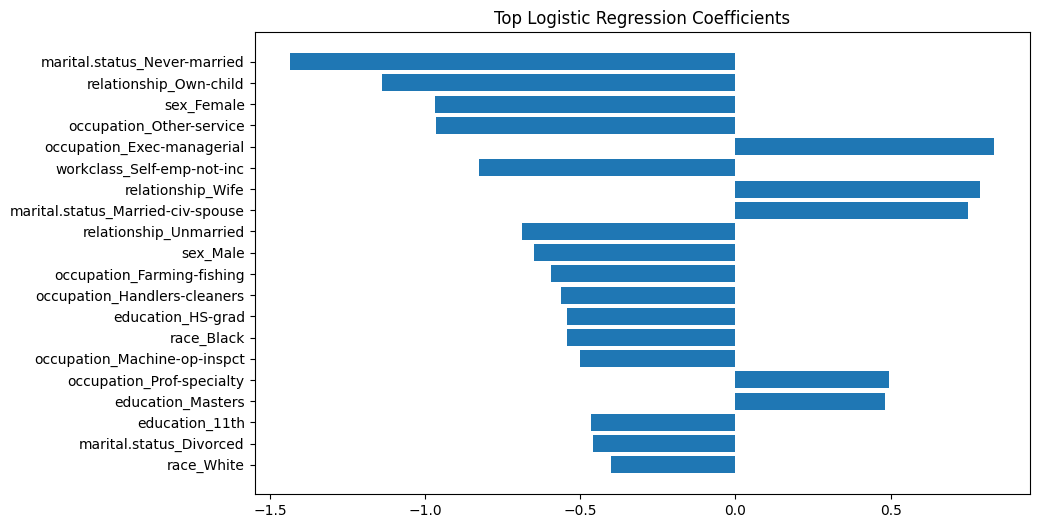

In [28]:
import matplotlib.pyplot as plt

top = coef_df_sorted.head(20)
plt.figure(figsize=(10,6))
plt.barh(top['feature'], top['coefficient'])
plt.gca().invert_yaxis()
plt.title("Top Logistic Regression Coefficients")
plt.show()


## random forest classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

In [31]:
rf_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('rf', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

n_estimators=200 → number of trees (200 is a good default)

random_state=42 → reproducibility

n_jobs=-1 → use all CPU cores to speed up training

In [32]:
rf_model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [33]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.848499917122493
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4533
           1       0.73      0.62      0.67      1500

    accuracy                           0.85      6033
   macro avg       0.80      0.77      0.79      6033
weighted avg       0.84      0.85      0.84      6033



In [35]:
rf = rf_model.named_steps['rf']
importances = rf.feature_importances_

In [36]:
ohe = rf_model.named_steps['preprocess'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(cat_cols)
all_feature_names = list(ohe_feature_names) + list(num_cols)

import pandas as pd
fi = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

fi.head(20)


,feature,importance
99,fnlwgt,0.158293
98,age,0.147621
101,capital.gain,0.093750
103,hours.per.week,0.079378
25,marital.status_Married-civ-spouse,0.068345
100,education.num,0.064091
44,relationship_Husband,0.050134
102,capital.loss,0.030652
27,marital.status_Never-married,0.019704
33,occupation_Exec-managerial,0.018561


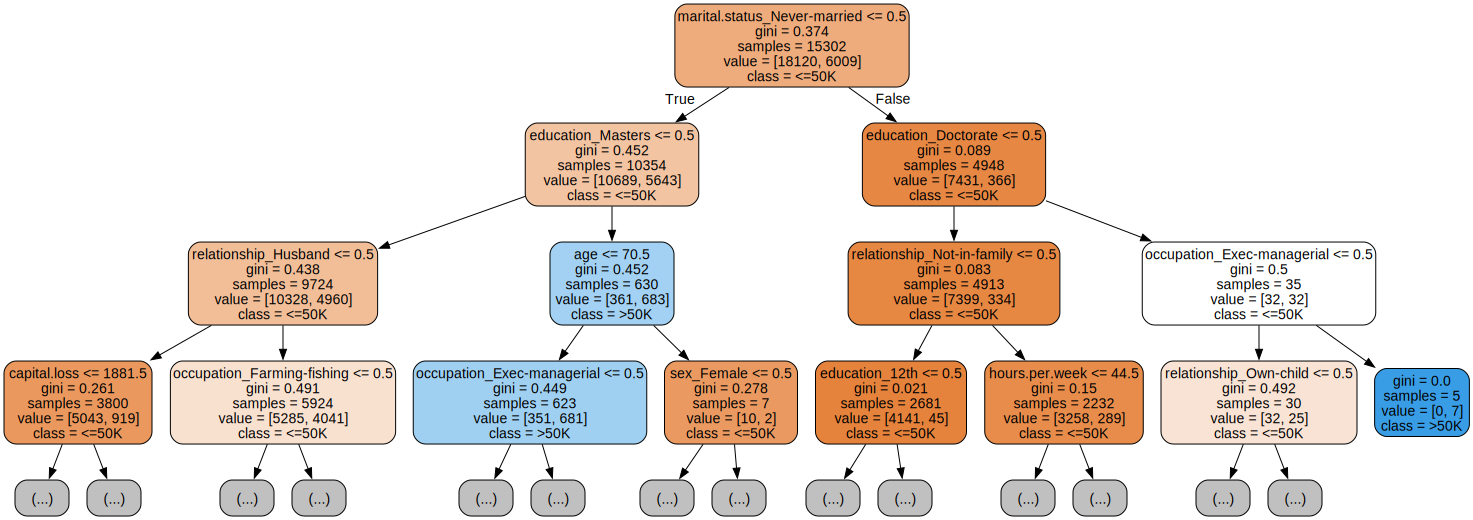

In [40]:
from sklearn.tree import export_graphviz
import graphviz

estimator = rf_model.named_steps['rf'].estimators_[0]

dot_data = export_graphviz(
    estimator,
    out_file=None,
    feature_names=all_feature_names,
    class_names=['<=50K', '>50K'],
    filled=True,
    rounded=True,
    max_depth=3
)

graph = graphviz.Source(dot_data)

# Export as PNG
graph.render("decision_tree", format="png", cleanup=True)

graph  # still displays inline if supported
